# Assignment 2 : Titanic Data Predictions


### Importing Required Libraries and Loading Data

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Loading Dataset

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocessing the Data

##### Display Some basic Information of the Dataset

Describe the Datatset

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Display column names

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Display Data type of each column

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Find Number of missing values

In [ ]:
column_names = df.columns
for column in column_names:
  print(column + " - "  + str(df[column].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


##### Insights into the Data



*   The targeet variable is - "Survived".
*   This column doesnt contribute to the target variable like :
        1. 'Ticket'

    It can be dropped from the datset.

* Also, the column 'Cabin' has many null values and thus cannot contribute to the output. This can also be dropped.
* Some columns do NOT have a null value, like:
        1. 'PClass'
        2. 'Sex'
        3. 'SibSp'
        4. 'Parch'
        5. 'Fare'

* There are a few missing values in the columns 'Age' and 'Embarked'. These can be imputed using different techniques.
* Also we can create a new variable for 'total family size' from the the column 'SibSp' and 'Parch'.







##### Removing Unecessary Columns

In [ ]:
df = df.drop(columns=['Ticket', 'Cabin'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


##### Handling NULL Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Input 'Embarked' with the majority class.

In [ ]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

There is one missing value for fare. So allot the median value to that.

In [ ]:
f_NaN_index = df['Fare'][df['Fare'].isnull()].index

In [ ]:
df['Fare'].iloc[f_NaN_index] = df['Fare'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

##### Filling in Missing values for 'Age'

First, find columns that are useful to predicy the value of Age. 

In [ ]:
corr_matrix = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

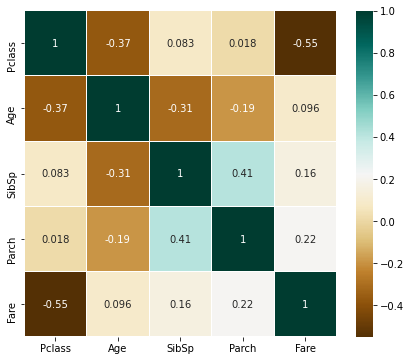

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(data = corr_matrix, cmap = 'BrBG', annot=True, linewidths=0.2)

From above, we can see that age has a negative relation with 'parch', 'sibsp', and 'pclass'.
Therefore, we fill 'age' with median age of similar rows from 'pclass', 'sibsp' and 'parch'. In case there are no similar rows, we fill the median age of the entire dataset.

In [ ]:
NaN_indexes = df['Age'][df['Age'].isnull()].index

In [ ]:
for i in NaN_indexes:
  pred_age = df['Age'][((df.SibSp == df.iloc[i]["SibSp"]) & (df.Parch == df.iloc[i]["Parch"]) & (df.Pclass == df.iloc[i]["Pclass"]))].median()
  if not np.isnan(pred_age):
    df['Age'].iloc[i] = pred_age
  else:
    df['Age'].iloc[i] = df['Age'].median()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

##### Handling non-numeric values

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

First, map 'sex' and 'embarked' to numerical values

In [ ]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C' : 0, 'Q': 1, 'S': 2})
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object

##### Handling 'Name' Column

Now, extract the title from 'name' column, and then drop the 'name' column.

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2


In [ ]:
df['title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df = df.drop(columns='Name')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,22.0,1,0,7.2500,2,Mr
1,2,1,1,1,38.0,1,0,71.2833,0,Mrs
2,3,1,3,1,26.0,0,0,7.9250,2,Miss
3,4,1,1,1,35.0,1,0,53.1000,2,Mrs
4,5,0,3,0,35.0,0,0,8.0500,2,Mr


Plotting a bar chart for the 'title' column

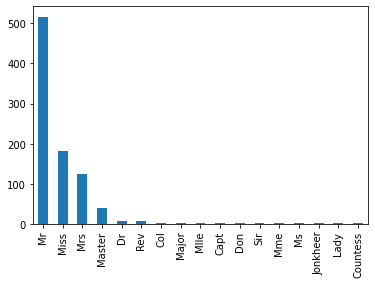

In [ ]:
df.title.value_counts().plot(kind='bar')

Group some of the rare titles into others.

In [ ]:
df['title'] = df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

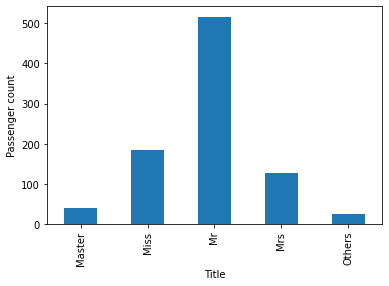

In [ ]:
plt = df.title.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
title           object
dtype: object

Mapping 'title' to numeric values.

In [ ]:
df['title'] = df['title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,0,22.0,1,0,7.2500,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,3
2,3,1,3,1,26.0,0,0,7.9250,2,1
3,4,1,1,1,35.0,1,0,53.1000,2,3
4,5,0,3,0,35.0,0,0,8.0500,2,2


##### Create new column for 'familysize'

In [ ]:
df['familysize'] = df['SibSp'] + df['Parch'] + 1
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,familysize
0,1,0,3,0,22.0,1,0,7.2500,2,2,2
1,2,1,1,1,38.0,1,0,71.2833,0,3,2
2,3,1,3,1,26.0,0,0,7.9250,2,1,1
3,4,1,1,1,35.0,1,0,53.1000,2,3,2
4,5,0,3,0,35.0,0,0,8.0500,2,2,1


### Visualising Data

##### Visualising 'Survived Column'

We know, majority passengers did not survive. Thus, Data is imbalanced.



Text(0, 0.5, 'Passenger Count')

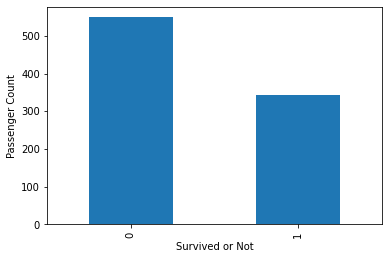

In [ ]:
plt = df.Survived.value_counts().plot(kind='bar')
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count')

##### Survival Probability based on Passenger Class

First, display number of passengers in each class. Majority are in 3rd class. 

Text(0, 0.5, 'Survival Probability')

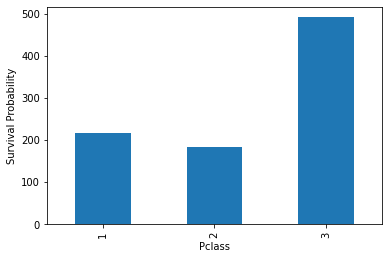

In [ ]:
plt = df.Pclass.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Now, plot survival probability based on pclass and survived column.

In [ ]:
df[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


In [ ]:
df[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survival Probability')

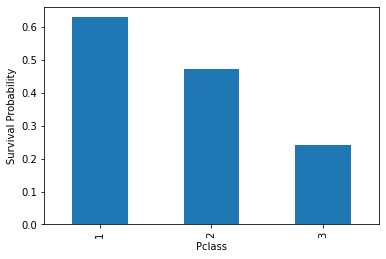

In [ ]:
plt = df[['Pclass', 'Survived']].groupby('Pclass').mean().Survived.plot(kind='bar')
plt.set_xlabel('Pclass')
plt.set_ylabel('Survival Probability')

Thus, we can say that 1st class has the highest probability of survival.

##### Sex Survival Probability

First, plot count passenger genders. 

Text(0, 0.5, 'Passenger count')

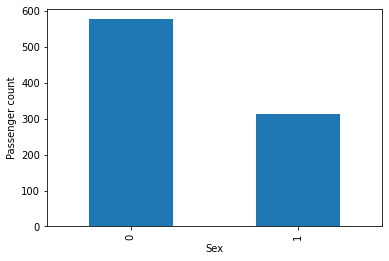

In [ ]:
plt = df.Sex.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Passenger count')

We can see that majority passengers are male.

Text(0, 0.5, 'Survival Probability')

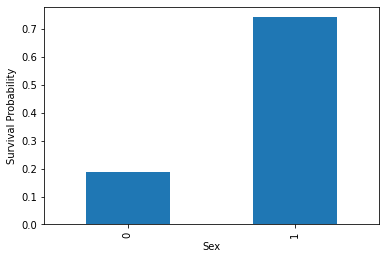

In [ ]:
plt = df[['Sex', 'Survived']].groupby('Sex').mean().Survived.plot(kind='bar')
plt.set_xlabel('Sex')
plt.set_ylabel('Survival Probability')

Females have higher probability of surviving. They may have been given higher priority.

##### 'Parch' Survival Probability

Text(0, 0.5, 'Passenger count')

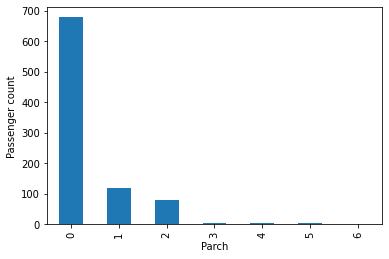

In [ ]:
plt = df.Parch.value_counts().sort_index().plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Passenger count')

Text(0, 0.5, 'Survival Probability')

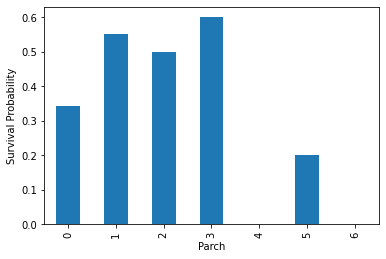

In [ ]:
plt = df[['Parch', 'Survived']].groupby('Parch').mean().Survived.plot(kind='bar')
plt.set_xlabel('Parch')
plt.set_ylabel('Survival Probability')

Thus, passengers having 3 children/parents have more survival probability.

### Splitting into train and test set

Since we need to find dependency only on the categories of 'age', 'gender' and 'pclass', drop other things from the df. 

In [ ]:
df = df.drop(columns = ['SibSp', 'Parch','Fare', 'Embarked', 'title', 'familysize'])

In [ ]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [ ]:
#converting Pclass,Sex to dummy variables
#categorical to dummies
dummies = []
cols = ['Pclass', 'Sex']
for col in cols:
    dummies.append(pd.get_dummies(df[col]))
titanic_dummies = pd.concat(dummies, axis=1)
#final dataset
df = pd.concat((df,titanic_dummies), axis=1)
#drop orignal comuns from dataset
df = df.drop(['Pclass', 'Sex'], axis=1)

df.columns

Index(['PassengerId', 'Survived', 'Age', 1, 2, 3, 0, 1], dtype='object')

In [ ]:
df.rename(columns={1: "Pclass:1", 2: "Pclass:2",3:"Pclass:3"})

,PassengerId,Survived,Age,Pclass:1,Pclass:2,Pclass:3,0,Pclass:1
0,1,0,22.0,0,0,1,1,0
1,2,1,38.0,1,0,0,0,1
2,3,1,26.0,0,0,1,0,1
3,4,1,35.0,1,0,0,0,1
4,5,0,35.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,1,0,1,0
887,888,1,19.0,1,0,0,0,1
888,889,0,13.5,0,0,1,0,1
889,890,1,26.0,1,0,0,1,0


Then we split the data frame into training and testing data.

In [ ]:
y = df['Survived']
X = df.drop(columns=['Survived'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


### Training the Models

Create the param grid object

In [ ]:
forest_params = dict(
    max_depth = [n for n in range(1, 32)],
    min_samples_split = [n for n in range(4, 11)],
    min_samples_leaf = [n for n in range(10, 14)],
    n_estimators = [n for n in range(10, 60, 10)],
)

instantiate and build the random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

model = RandomForestClassifier()
cv_forest = GridSearchCV(estimator=model, param_grid = forest_params, cv=5)
cv_forest.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

Display the best possible score and the optimal parameters

In [ ]:
print("Best Score: {}".format(cv_forest.best_score_))
print("Optimal params: {}".format(cv_forest.best_estimator_))

Best Score: 0.8181783943255289
Optimal params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Calculate and display predictions and the accuracy percentage

In [ ]:
y_predictions = cv_forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predictions)
accuracy_percentage = 100 * accuracy
accuracy_percentage

86.03351955307262

Display the confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_predictions, y_test)
pd.DataFrame(conf_matrix, index=['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,104,19
Actual 1,6,50
